# LSTM test / speaker prediction

In [7]:
import sqlite3


conn = sqlite3.connect("./LibriSpeech/train-clean-100.db")
cur = conn.cursor()
cur.execute('''select distinct readerID, gender from data''' )
obj = cur.fetchall()
conn.close()
print(obj)

[(103, 1), (1034, 0), (1040, 0), (1069, 1), (1081, 0), (1088, 1), (1098, 1), (1116, 1), (118, 0), (1183, 1), (1235, 0), (1246, 1), (125, 1), (1263, 1), (1334, 0), (1355, 0), (1363, 1), (1447, 1), (1455, 0), (150, 1), (1502, 1), (1553, 1), (1578, 1), (1594, 0), (1624, 0), (163, 0), (1723, 0), (1737, 1), (1743, 0), (1841, 1), (1867, 0), (1898, 1), (19, 1), (1926, 1), (196, 0), (1963, 1), (1970, 1), (198, 1), (1992, 1), (200, 1), (2002, 0), (2007, 1), (201, 0), (2092, 1), (211, 1), (2136, 0), (2159, 0), (2182, 1), (2196, 1), (226, 1), (2289, 0), (229, 0), (233, 0), (2384, 0), (2391, 1), (2416, 1), (2436, 0), (248, 1), (250, 1), (2514, 0), (2518, 0), (254, 0), (26, 0), (2691, 1), (27, 0), (2764, 1), (2817, 1), (2836, 1), (2843, 0), (289, 1), (2893, 0), (2910, 1), (2911, 0), (2952, 0), (298, 1), (2989, 1), (302, 1), (307, 0), (311, 0), (3112, 1), (3168, 0), (32, 1), (3214, 0), (322, 1), (3235, 1), (3240, 0), (3242, 0), (3259, 1), (328, 1), (332, 0), (3374, 0), (3436, 0), (3440, 1), (3486, 0

In [10]:
import collections
collections.Counter([j for i,j in obj])


Counter({0: 126, 1: 125})

In [23]:
gender_dict = {k:v for k,v in obj}

In [22]:
import glob
import subprocess
import sys

readerIDs = [x[0] for x in obj]
for readerID in readerIDs:
    for i in glob.glob("./LibriSpeech/train-clean-100/{}/*".format(readerID)):
        print(i)
        for flac_path in glob.glob("./LibriSpeech/train-clean-100/{0}/{1}/*".format(readerID, i.split("/")[-1])):
            res = subprocess.run(["ffmpeg", "-i", flac_path, "./"+flac_path.split('/')[-1]+".wav"], stdout=subprocess.PIPE)
            break
        break


./LibriSpeech/train-clean-100/103/1240
./LibriSpeech/train-clean-100/1034/121119
./LibriSpeech/train-clean-100/1040/133433
./LibriSpeech/train-clean-100/1069/133699
./LibriSpeech/train-clean-100/1081/125237
./LibriSpeech/train-clean-100/1088/129236
./LibriSpeech/train-clean-100/1098/133695
./LibriSpeech/train-clean-100/1116/132847
./LibriSpeech/train-clean-100/118/121721
./LibriSpeech/train-clean-100/1183/124566
./LibriSpeech/train-clean-100/1235/135883
./LibriSpeech/train-clean-100/1246/124548
./LibriSpeech/train-clean-100/125/121124
./LibriSpeech/train-clean-100/1263/138246
./LibriSpeech/train-clean-100/1334/135589
./LibriSpeech/train-clean-100/1355/39947
./LibriSpeech/train-clean-100/1363/135842
./LibriSpeech/train-clean-100/1447/130550
./LibriSpeech/train-clean-100/1455/134435
./LibriSpeech/train-clean-100/150/126107
./LibriSpeech/train-clean-100/1502/122615
./LibriSpeech/train-clean-100/1553/140047
./LibriSpeech/train-clean-100/1578/140045
./LibriSpeech/train-clean-100/1594/135914

./LibriSpeech/train-clean-100/730/358
./LibriSpeech/train-clean-100/7302/86814
./LibriSpeech/train-clean-100/7312/92432
./LibriSpeech/train-clean-100/7367/86737
./LibriSpeech/train-clean-100/7402/59171
./LibriSpeech/train-clean-100/7447/91186
./LibriSpeech/train-clean-100/7505/258958
./LibriSpeech/train-clean-100/7511/102419
./LibriSpeech/train-clean-100/7517/100429
./LibriSpeech/train-clean-100/7635/105409
./LibriSpeech/train-clean-100/7780/274562
./LibriSpeech/train-clean-100/7794/295947
./LibriSpeech/train-clean-100/78/368
./LibriSpeech/train-clean-100/7800/283478
./LibriSpeech/train-clean-100/7859/102518
./LibriSpeech/train-clean-100/8014/112586
./LibriSpeech/train-clean-100/8051/118101
./LibriSpeech/train-clean-100/8063/274112
./LibriSpeech/train-clean-100/8088/284756
./LibriSpeech/train-clean-100/8095/274345
./LibriSpeech/train-clean-100/8098/275181
./LibriSpeech/train-clean-100/8108/274318
./LibriSpeech/train-clean-100/8123/275193
./LibriSpeech/train-clean-100/8226/274369
./Libr

In [43]:
def load_wav(file_path):
    from scipy.io.wavfile import read

    wavfile = file_path

    fs, data = read(wavfile)

#     print("Sampling rate :", fs)
#     print("Sample num :",len(data))
    
    return fs,data

In [48]:
all_data = np.empty((0,10000), int)
# all_data = []
all_labels = []
for path in glob.glob("wav_samples/*"):
    fs,data = load_wav(path)
    all_data = np.append(all_data, np.array([data[:10000]]), axis=0)
#     all_data.append(data[:10000])
    all_labels.append(gender_dict[int(path.split("/")[1].split("-")[0])])
#     print("gen",gender_dict[int(path.split("/")[1].split("-")[0])])
#     print(data[:10])

print(all_data)
print(all_labels)
all_labels = np.array(all_labels)

[[ -213  -181  -203 ...,   610   482   326]
 [  563   573   581 ...,  1779  1603  1558]
 [   -8    -3     5 ...,  1381  1308  1443]
 ..., 
 [  -14    -7   -20 ...,  1735 -1020    33]
 [  -41   -25    -8 ...,  6018  6188  6315]
 [   17    17    -1 ...,  -206  -238  -261]]
[1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1

In [53]:
x_train = all_data[:10]
y_train = all_labels[:10]
x_test = all_data[100:105]
y_test = all_labels[100:105]

In [54]:
print(x_train.shape)

(10, 10000)


In [60]:
X_train = np.empty((0,1000),int)
Y_train = []
X_test = np.empty((0,1000),int)
Y_test = []
for j in range(10):
    for i in range(10):
        X_train = np.append(X_train,np.array([x_train[j][i:i+1000]]),axis= 0 )
        Y_train.append(y_train[j])
Y_train = np.array(Y_train)
        
for j in range(5):
    for i in range(10):
        X_test = np.append(X_test,np.array([x_test[j][i:i+1000]]),axis= 0 )
        Y_test.append(y_test[j])
Y_test = np.array(Y_test)

In [67]:
X_train = X_train.reshape(100,1000,1)
X_test = X_test.reshape(50,1000,1)

In [70]:
from keras.utils import np_utils

nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)
print(Y_train.shape)


(100, 2)


In [51]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
# random.seed(0)
# # 乱数の係数
# random_factor = 0.05
# # サイクルあたりのステップ数
# steps_per_cycle = 80
# # 生成するサイクル数
# number_of_cycles = 50

# df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
# df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
# df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [77]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM

length_of_sequences = 1000
in_out_neurons = 2
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, 1), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="categorical_crossentropy", optimizer="adam")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 300)               362400    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 602       
_________________________________________________________________
activation_5 (Activation)    (None, 2)                 0         
Total params: 363,002
Trainable params: 363,002
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train, Y_train, batch_size=600, epochs=15, validation_split=0.05) 

Train on 95 samples, validate on 5 samples
Epoch 1/15


KeyboardInterrupt: 

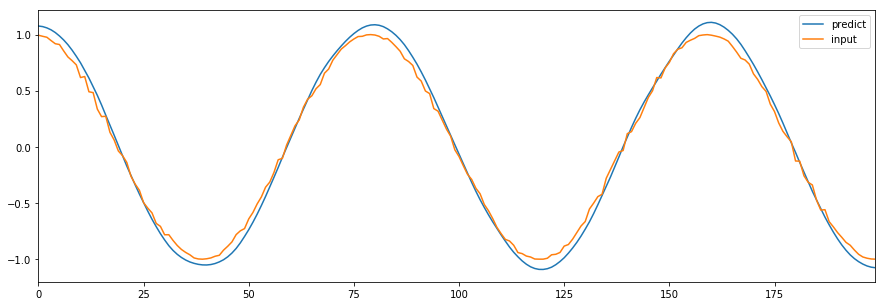

In [7]:
predicted = model.predict(X_test) 
dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))